In [11]:
%matplotlib inline

## 12.2 The Support Vector Classifier

$X\in\mathbb{R}^p$ and $y_i \in \left\{-1,1\right\}$

### Separable classes without margin

#### Model

For a hyperplane $\mathcal{H}$ defines by $f(x)=\beta_0+\beta^{T}x=0$

$$G(x)=sign(\beta_{0} + \beta^{T}x)$$

The classification formula is the same for the other two SVC cases that we will see later and the SVM. The difference between the three SVC lies in the process defining the coefficients of the model.

#### Fit

A separating hyperplane has the two following properties, $\forall i$:

$\begin{cases}
\beta_{0} + \beta^{T}x_i > 0 \;\; if \;\; y_i=1 \\
\beta_{0} + \beta^{T}x_i < 0 \;\; if \;\; y_i=-1
\end{cases}$

These two properties are equivalent to: 

$$\forall i, y_if(x_i)>0$$

Issue: infinite number of hyperplane

### Separable classes with margin

To have a unique hyperplane, we select the hyperplane $\mathcal{H}$ that maximizes the distance between the two classes. Through this process, we create two hyperplanes $\mathcal{H}^-$ and $\mathcal{H}^+$ at a distance $M$ from $\mathcal{H}$ and symmetric to $\mathcal{H}$. We have then ($\delta \ne M$ unless at most one $\beta$ coefficient is different from zero),

$\begin{cases}
\mathcal{H}, & f(x)=0 \\
\mathcal{H}^-, & f(x)=-\delta \\
\mathcal{H}^+, & f(x)=+\delta
\end{cases}$

By convention we chosse $\delta = 1$ (a different $\delta$ changes $\beta_0$) thus,

$\begin{cases}
\mathcal{H}, & f(x)=0 \\
\mathcal{H}^-, & f(x)=-1 \\
\mathcal{H}^+, & f(x)=+1
\end{cases}$

#### Fit: Optimization Problem

During the training $\forall i$,

$\begin{cases}
f(x_i) \le 1 \;\; if \;\; y_i=-1 \\
f(x_i) \ge 1 \;\; if \;\; y_i=1
\end{cases}$

This is equivalent to,

$$\forall i, y_{i}f(x_i) \ge 1$$

We recall that the aim is to maximize the margin and to ensure that $\forall i, y_{i}f(x_i) \ge 1$. Knowing that $M = \frac{1}{\lVert \beta \rVert}$ we have the following optimization problem,

$$\underset{\beta_{0},\beta}{min}{\lVert \beta \rVert}$$

$$subject \, to \;\; \forall i \; y_{i}(\beta^{T} x_i + \beta_0)=y_{i}f(x_i) \ge 1 \tag{12.4}$$

Thus, minimizing ${\lVert \beta \rVert}$ is equivalent to maximizing $M$.

### Classes Overlap With Margin

As the classes overlap, some $x$ will be wrongly classified during the training. An obervation is misclassified if it is not on the correct side of $\mathcal{H}$ and\or between $\mathcal{H^-}$ and $\mathcal{H^+}$.

To measure the loss generated by a misclassification we used the hinge loss function,

$$L_{hinge}\left(x_i,y_i\right)=\max{\left(0,1-y_{i}f\left(x_i\right)\right)}$$

We summarize below the six cases that can occur during training:
- $y_i=1$ and $f(x_i)$ correctly classified (outside the margin) then $f(x_i) > 1$ and   $L_{hinge}\left(x_i,y_i\right)=0$ as $y_{i}f(x_i) > 1$

- $y_i=-1$ and $f(x_i)$ correctly classified (outside the margin) then $f(x_i) < -1$ and   $L_{hinge}\left(x_i,y_i\right)=0$ as $y_{i}f(x_i) > 1$

- $y_i=1$ and $f(x_i)$ incorrectly classified and inside the margin then $0 < f(x_i) < 1$ and   $0<L_{hinge}\left(x_i,y_i\right)<1$ as $0 < y_{i}f(x_i) < 1$

- $y_i=-1$ and $f(x_i)$ incorrectly classified and inside the margin then $-1 < f(x_i) < 0$ and   $0<L_{hinge}\left(x_i,y_i\right)<1$ as $0 < y_{i}f(x_i) < 1$

- $y_i=1$ and $f(x_i)$ incorrectly classified and outside the margin then $f(x_i) < -1$ and   $L_{hinge}\left(x_i,y_i\right) > 1$ as $y_{i}f(x_i) < -1$

- $y_i=-1$ and $f(x_i)$ incorrectly classified and outside the margin then $f(x_i) > 1$ and   $L_{hinge}\left(x_i,y_i\right) > 1$ as $y_{i}f(x_i) < -1$

#### Fit: Optimization Problem

As for $(12.4)$ and by taking into account the misclassification, the optimization problem is,

$$\underset{\beta_{0},\beta}{min}{\frac{1}{2}{\lVert \beta \rVert}^{2}+C\sum_{i=1}^{N}{L_{hinge}\left(x_i,y_i\right)}}$$

$$subject \; to \;\; \forall i \; y_{i}f(x_i) \ge 1$$

$C$ is called the cost parameter, it is a positive tuning parameter, the higher its value, the more the misclassifications penalize the minimization. Thus, the term $C\sum_{i=1}^{N}{L_{hinge}\left(x_i,y_i\right)}$ regularizes the minimization. 

The optimization problem below is equivalent to the above formula and is more computationally convenient.

$$\underset{\beta_{0},\beta}{min}{\frac{1}{2}{\lVert \beta \rVert}^{2}+C\sum_{i=1}^{N}\xi_i}$$

$$subject \; to \;\; \forall i \; \xi_{i} \ge 1 - y_{i}f(x_{i}) \;\; and \;\; \xi_{i} \ge 0 \tag{12.8}$$

To prove the equivalence, we notice that:

- $\forall i$ {$1 - y_{i}f(x_{i}) < 0$ then $\xi_{i} = 0$ and $\xi_{i} > 1 - y_{i}f(x_{i})$} and {$1 - y_{i}f(x_{i}) \ge 0$ then $\xi_{i} = 1 - y_{i}f(x_{i})$} therefore $\xi_{i} \ge 1 - y_{i}f(x_{i})$
- As $\forall i \;\; \xi_{i} \ge 0$ then $0 \ge 1 - y_{i}f(x_{i})$ therefore $y_{i}f(x_i) \ge 1$

### 12.2.1 Computing the Support Vector Classifier

#### Lagrange primal function

The Lagrange primal function is,

$${L_P}={\frac{1}{2}{\lVert \beta \rVert}^{2}} + C\sum_{i=1}^{N}{\xi_i} - \sum_{i=1}^{N}{\alpha_{i}[y_{i}(\beta_{0} + x_{i}^{T}\beta) - (1-\xi_{i})]} - \sum_{i=1}^{N}{\mu_{i}\xi_i} \tag{2.19}$$

With $\alpha_{i}, \mu_{i}, \xi_{i} \ge 0$

#### Optimization problem for the primal problem

The optimization problem becomes,

$$\underset{\beta_{0}\in\mathbb{R}, \beta\in\mathbb{R}^{p}, \xi\in\mathbb{R}^{n}}{min} \; L_{P}$$

With $\alpha_{i}, \mu_{i}, \xi_{i} \ge 0$

And with the Karush-Kuhn-Tucker constraints,

$$\alpha_i [y_{i}f(x_{i})+\xi_{i}-1]=0 \tag{12.14}$$

$$\mu_{i}\xi_{i}=0 \tag{12.15}$$

$$y_{i}f(x_{i})+\xi_{i}-1=0 \tag{12.16}$$

Setting the respective derivatives of $L_p$ to zero we get,

$$\beta = \sum_{i=1}^{N}{\alpha_{i}y_{i}x_{i}} \tag{12.10}$$

$$0 = \sum_{i=1}^{N}{\alpha_{i}y_{i}} \tag{12.11}$$

$$\forall i, \; \alpha_{i} = C - \mu_{i} \tag{12.12}$$

#### Lagrange dual function

The below formula is the dual form of the Lagrange function. This is a quadratic problem. Therefore it easier to solve than the previous. Additionally, it will be useful to express the generalization of the boundarie, i.e. non linear.

$${L_D} = \sum_{i=1}^{N}{\alpha_i} - \frac{1}{2}\sum_{i=1}^{N}{\sum_{i'=1}^{N}{\alpha_{i}\alpha_{i'}y_{i}y_{i'}x_{i}^{T}x_{i'}}} \tag{12.13}$$

#### Optimization problem for the dual problem

$$\underset{\alpha\in\mathbb{R}^{n}}{max} \; L_{D}$$

With,

$0 \le \alpha_{i} \le C$, $\sum_{i=1}^{N}{\alpha_{i}y_{i}}=0$, $(12.10)-(12.12)$ and $(12.14)-(12.16)$

Finally, $(12.10)-(12.16)$ uniquely characterize the solution to the primal Lagrange and dual Lagrange problem.

#### $f(x)$ solution

$$\hat{\beta} = {\sum_{i=1}^{N}{\hat{\alpha}_{i}y_{i}x_{i}}} \tag{12.17}$$

$$\hat{\alpha}_{i} \ne 0 \Longrightarrow \hat{\beta}_{0}={\frac{1}{y_i}-x_{i}^{T}\hat{\beta}}$$

#### Geometric interpration of $\hat{\alpha}_{i}$

- If $\hat{\alpha}_{i} = 0$ then the $i$th observation is correclty classified
- If $\hat{\alpha}_{i} = C$ then the $i$th observation is misclassified
- If  $ 0 < \hat{\alpha}_{i} < C$ then then the $i$th observation is on the margin (support vector)

### 12.2.2 Mixture Example

#### Data

In [1]:
import numpy as np
import numpy.random as rand

In [2]:
# We use the function defined in section 2.4
def generate_data(sample_size: int) -> tuple:

    # Parameters for mean gaussian distribution
    mean_expected_blue = [1,0]
    mean_expected_orange = [0,1]
    mean_cov = np.eye(2)
    
    # Generate 10 means for blue class and orange class
    nb_real = 10
    sample_blue_mean = rand.multivariate_normal(mean_expected_blue,
                                                mean_cov, nb_real)
    sample_orange_mean = rand.multivariate_normal(mean_expected_orange,
                                                  mean_cov, nb_real)
    
    # Covariance for data gaussian distribution
    data_cov = np.eye(2)/5
    
    # Function that generates an observation for the blue class
    x_blue = lambda : rand.multivariate_normal(sample_blue_mean[rand.randint(0, 9)],
                                               data_cov)
    # Function that generates an observation for the orange class
    x_orange = lambda : rand.multivariate_normal(sample_orange_mean[rand.randint(0, 9)],
                                                 data_cov)
    # Generate the sample X
    X = np.array([
        np.vstack((x_blue(), x_orange()))
        for _ in range(int(sample_size/2))
    ])
    
    X = X.reshape(sample_size, 2)
  
    # Generate the sample y
    y = np.empty((sample_size,))
    y[::2] = 0
    y[1::2] = 1
    
    return (X, y, sample_blue_mean, sample_orange_mean)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Generate data
sample_size = 200
X, y, blue_mean, orange_mean = generate_data(sample_size)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.5)

X_blue_test = X_test[y_test == 1, :]
X_orange_test = X_test[y_test == -1, :]

#### Bayes classifier

In [5]:
from scipy.stats import multivariate_normal

In [6]:
# Pdf of the two classes as defined in section 2.2
def pdf_data(x: np.ndarray, mean: np.ndarray) ->np.array: 
    return np.mean([multivariate_normal.pdf(x, mean=m, cov=np.eye(2)/5)
                    for m in mean], axis=0)

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
# Predictions
y_pred = pdf_data(X_test, orange_mean) > pdf_data(X_test, blue_mean)
y_pred = y_pred.astype(int)

# Bayes error
error_bayes = 1 - accuracy_score(y_test, y_pred)
error_bayes_str = f"{error_bayes:.2f}"

#### Fit and errors

In [9]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.offsetbox import AnchoredText

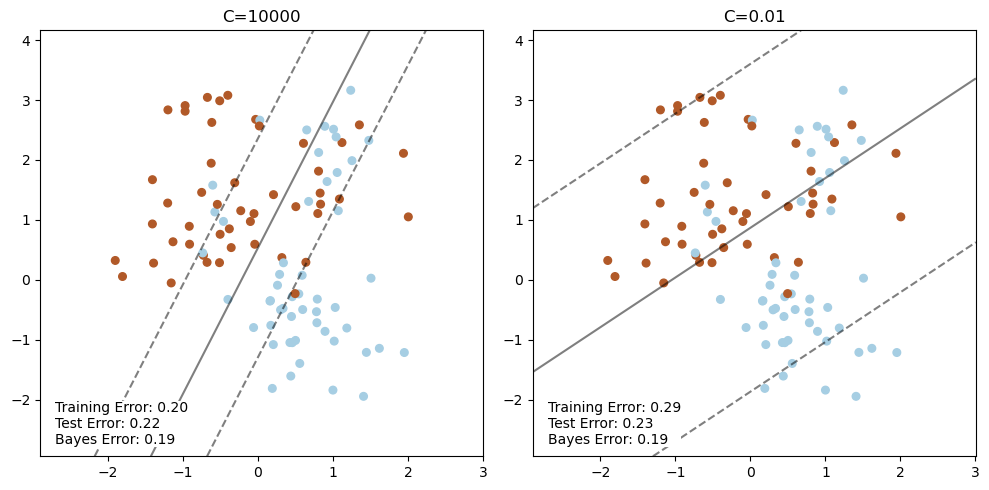

In [10]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(10, 5))

for i, C in enumerate([10_000, 0.01]):

    # Create an SVC model with a linear kernel and the specified value of C
    cls_svc = SVC(kernel="linear", C=C).fit(X_train, y_train)

    # Compute the decision function on the training data
    decision_function = cls_svc.decision_function(X_train)

    # Find the indices of the support vectors
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]

    # Get the support vectors
    support_vectors = X_train[support_vector_indices]

    # Create a subplot for the current value of C
    plt.subplot(1, 2, i + 1)

    # Scatter plot the training data
    plt.scatter(X_train[:, 0],
                X_train[:, 1],
                c=y_train, s=30,
                cmap=plt.cm.Paired)
    
    ax = plt.gca()
    
    # Get the decision boundary
    DecisionBoundaryDisplay.from_estimator(
        cls_svc,
        X_train,
        ax=ax,
        grid_resolution=50,
        plot_method="contour",
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )

    # Scatter plot the support vectors
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
    )
    
    # Compute the errors
    error_train = 1 - cls_svc.score(X_train, y_train)
    error_test = 1 - cls_svc.score(X_test, y_test)
    
    # Display the errors
    error_train_str = f"{error_train:.2f}"
    error_test_str = f"{error_test:.2f}"
    
    text_error = ("Training Error: "+
                  error_train_str+
                  "\n"+
                  "Test Error: "+
                  error_test_str+
                  "\n"+
                  "Bayes Error: "+
                   error_bayes_str)
    
    param_box = {'bbox': {'facecolor': 'white', 'pad': 0.1, 'edgecolor': 'none'}}
    
    plt.text(ax.get_xlim()[0]+0.2,
             ax.get_ylim()[0]+0.2,
             text_error, param_box)
    
    
    plt.title("C=" + str(C))

plt.tight_layout()
plt.show()

As expected, the learning error is smaller for $C=10,000$ than for $C=0.01$. However, the order is unknown for the test error.